In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cnn_model import CNN_1d

In [90]:
df = pd.read_csv('transformed.csv', parse_dates=[0])
# df[df.columns[0]] = pd.to_datetime(df[df.columns[0]]).dt.date
# df.rename(columns={df.columns[0]: 'date'}, inplace=True)
df.rename(columns={df.columns[0]: 'Index'}, inplace=True)
df.set_index('Index', inplace=True)

df.tail()

,"Gross Domestic Product, Year On Year Growth Rate | GDP In Chained (2015) Dollars","Food & Beverage Services Index, (2017 = 100), In Chained Volume Terms | Total","Retail Sales Index, (2017 = 100), In Chained Volume Terms | Total",Sea Cargo And Shipping Statistics (Total Cargo) | Total Container Throughput (Thousand Twenty-Foot Equivalent Units),Air Cargo Tonnage | Total Direct Tonnage (Tonne),Domestic Exports By Commodity Division | Total Domestic Exports,Merchandise Imports By Commodity Division | Total Merchandise Imports,Straits Times Index (STI),M1 Money Supply,Index Of Industrial Production (2019 = 100) | Total,...,Business Expectations Of The Manufacturing Sector | General Business Expectations (Forecast For Next 6 Months),"Business Expectations For The Services Sector - Operating Receipts Forecast For The Next Quarter, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Business Expectations For The Services Sector - General Business Outlook For The Next 6 Months, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Domestic Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Foreign Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Business Receipts Index For Services Industries, (2014=100) | Total Services",Tourism Receipts By Major Components (Year-To-Date) | Tourism Receipts,Average Monthly Nominal Earnings Per Employee | Overall Economy,Job Vacancies By Industry And Occupational Group (SSIC 2020) (End Of Period) | Total,Unemployment Rate (End Of Period) | Total Unemployment Rate
Index,,,,,,,,,,,,,,,,,,,,,
2023-02-28,NaN,88.697,8.642604,-5.595217,87288.0,-7.968684,-4.710306,0.629202,-14.146439,-9.611680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,0.4,94.430,2.485396,7.962453,97640.0,-6.657592,-10.954811,-4.389027,-13.852377,-3.782552,...,2.0,5.0,4.0,10.326168,-1.187316,7.914683,NaN,5.72203,NaN,-20.0
2023-04-30,NaN,NaN,NaN,7.320842,90960.0,-15.343188,-19.538985,-2.573803,-13.460250,-6.857134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.279969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.066276,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# train = df[(df['date'] < "2022-01-31") & (df['date'] >= "2008-12-31")].copy()
# test = df[df['date'] >= "2022-01-31"].copy()
# test_dateindex = test.index
total = df[(df.index >= "2008-12-31")].copy()
train = df[(df.index < "2020-01-31") & (df.index >= "2008-12-31")].copy()
test = df[df.index >= "2020-01-31"].copy()
total_dateindex = total.index
train_dateindex = train.index
test_dateindex = test.index

In [88]:
train

,"Gross Domestic Product, Year On Year Growth Rate | GDP In Chained (2015) Dollars","Food & Beverage Services Index, (2017 = 100), In Chained Volume Terms | Total","Retail Sales Index, (2017 = 100), In Chained Volume Terms | Total",Sea Cargo And Shipping Statistics (Total Cargo) | Total Container Throughput (Thousand Twenty-Foot Equivalent Units),Air Cargo Tonnage | Total Direct Tonnage (Tonne),Domestic Exports By Commodity Division | Total Domestic Exports,Merchandise Imports By Commodity Division | Total Merchandise Imports,Straits Times Index (STI),M1 Money Supply,Index Of Industrial Production (2019 = 100) | Total,...,Business Expectations Of The Manufacturing Sector | General Business Expectations (Forecast For Next 6 Months),"Business Expectations For The Services Sector - Operating Receipts Forecast For The Next Quarter, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Business Expectations For The Services Sector - General Business Outlook For The Next 6 Months, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Domestic Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Foreign Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Business Receipts Index For Services Industries, (2014=100) | Total Services",Tourism Receipts By Major Components (Year-To-Date) | Tourism Receipts,Average Monthly Nominal Earnings Per Employee | Overall Economy,Job Vacancies By Industry And Occupational Group (SSIC 2020) (End Of Period) | Total,Unemployment Rate (End Of Period) | Total Unemployment Rate
Index,,,,,,,,,,,,,,,,,,,,,
2008-12-31,-3.4,111.020,-2.901788,-13.129482,71764.0,-26.630491,-16.535568,-49.412744,18.400778,-13.353550,...,-57.0,-50.0,-53.0,-5.352450,-5.855964,0.762965,15475.0,2.397094,-32.843137,50.000000
2009-01-31,NaN,103.900,-14.369889,-19.596025,62847.0,-38.103156,-33.491589,-41.427997,22.695253,-25.720580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-28,NaN,92.981,-8.246227,-19.836250,61659.0,-29.419618,-20.727707,-47.300423,18.786351,-11.458467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-31,-7.7,98.286,-8.559808,-14.561178,70340.0,-25.486613,-28.249462,-43.472767,23.653916,-32.247239,...,-33.0,-36.0,-48.0,-5.620785,-7.093380,-4.391739,3154.0,-3.730306,-44.009780,66.666667
2009-04-30,NaN,94.763,-13.298309,-17.718322,70843.0,-30.420591,-31.284065,-38.995489,18.165993,0.763602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,NaN,105.044,-4.167222,-0.716028,101294.0,-15.694871,-6.401382,-3.329703,1.659029,-7.283045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,0.9,101.372,-2.825478,3.512998,102895.0,-13.321081,-4.799708,-4.209266,1.754846,-1.427808,...,-5.0,3.0,1.0,-0.245198,-2.843747,1.425308,20549.0,4.453849,-16.429700,5.263158
2019-10-31,NaN,102.131,-4.751684,2.578415,104161.0,-15.734749,-10.279690,6.992845,1.837973,3.923345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
test

,"Gross Domestic Product, Year On Year Growth Rate | GDP In Chained (2015) Dollars","Food & Beverage Services Index, (2017 = 100), In Chained Volume Terms | Total","Retail Sales Index, (2017 = 100), In Chained Volume Terms | Total",Sea Cargo And Shipping Statistics (Total Cargo) | Total Container Throughput (Thousand Twenty-Foot Equivalent Units),Air Cargo Tonnage | Total Direct Tonnage (Tonne),Domestic Exports By Commodity Division | Total Domestic Exports,Merchandise Imports By Commodity Division | Total Merchandise Imports,Straits Times Index (STI),M1 Money Supply,Index Of Industrial Production (2019 = 100) | Total,...,Business Expectations Of The Manufacturing Sector | General Business Expectations (Forecast For Next 6 Months),"Business Expectations For The Services Sector - Operating Receipts Forecast For The Next Quarter, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Business Expectations For The Services Sector - General Business Outlook For The Next 6 Months, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Domestic Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Foreign Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Business Receipts Index For Services Industries, (2014=100) | Total Services",Tourism Receipts By Major Components (Year-To-Date) | Tourism Receipts,Average Monthly Nominal Earnings Per Employee | Overall Economy,Job Vacancies By Industry And Occupational Group (SSIC 2020) (End Of Period) | Total,Unemployment Rate (End Of Period) | Total Unemployment Rate
Index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,107.212,-6.496325,6.118502,93951.0,1.095126,-0.898555,-1.144129,5.266109,3.687558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,82.475,-10.481714,5.772669,93170.0,5.824942,9.419933,-6.275096,6.883824,-0.525050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,1.3,77.779,-15.106828,1.074623,99611.0,7.960233,0.230369,-22.773818,10.895836,21.515549,...,-56.0,-53.0,-58.0,3.875820,0.525313,-0.184912,4029.0,2.381349,-18.829982,10.000000
2020-04-30,NaN,46.492,-41.219432,-4.966412,75451.0,-10.426102,-13.115570,-22.822187,15.867581,12.012635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,NaN,48.371,-52.310330,-10.551979,80453.0,-27.273694,-26.219455,-19.468856,21.273229,-7.863901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,-11.9,56.624,-28.264025,-2.979646,82903.0,-9.591784,-9.899921,-22.028540,23.449347,-6.053370,...,-7.0,-29.0,-31.0,-12.096338,3.501373,-13.938541,4187.0,0.976077,-20.593692,26.666667
2020-07-31,NaN,76.382,-9.413992,-6.771960,87290.0,-7.762648,-9.960494,-23.357974,28.133596,-7.142407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,76.748,-6.896773,1.308358,85951.0,-3.775364,-11.039271,-18.477386,26.941762,16.368931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,-4.3,73.172,-11.189018,3.678206,90207.0,-3.736464,-1.645632,-20.942308,28.380858,25.934764,...,-3.0,-5.0,-5.0,-22.731706,1.346392,-9.470102,4436.0,0.598109,0.756144,60.000000


In [93]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
total = total.fillna(method='ffill')

train

,"Gross Domestic Product, Year On Year Growth Rate | GDP In Chained (2015) Dollars","Food & Beverage Services Index, (2017 = 100), In Chained Volume Terms | Total","Retail Sales Index, (2017 = 100), In Chained Volume Terms | Total",Sea Cargo And Shipping Statistics (Total Cargo) | Total Container Throughput (Thousand Twenty-Foot Equivalent Units),Air Cargo Tonnage | Total Direct Tonnage (Tonne),Domestic Exports By Commodity Division | Total Domestic Exports,Merchandise Imports By Commodity Division | Total Merchandise Imports,Straits Times Index (STI),M1 Money Supply,Index Of Industrial Production (2019 = 100) | Total,...,Business Expectations Of The Manufacturing Sector | General Business Expectations (Forecast For Next 6 Months),"Business Expectations For The Services Sector - Operating Receipts Forecast For The Next Quarter, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Business Expectations For The Services Sector - General Business Outlook For The Next 6 Months, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Domestic Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Foreign Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Business Receipts Index For Services Industries, (2014=100) | Total Services",Tourism Receipts By Major Components (Year-To-Date) | Tourism Receipts,Average Monthly Nominal Earnings Per Employee | Overall Economy,Job Vacancies By Industry And Occupational Group (SSIC 2020) (End Of Period) | Total,Unemployment Rate (End Of Period) | Total Unemployment Rate
Index,,,,,,,,,,,,,,,,,,,,,
2008-12-31,-3.4,111.020,-2.901788,-13.129482,71764.0,-26.630491,-16.535568,-49.412744,18.400778,-13.353550,...,-57.0,-50.0,-53.0,-5.352450,-5.855964,0.762965,15475.0,2.397094,-32.843137,50.000000
2009-01-31,-3.4,103.900,-14.369889,-19.596025,62847.0,-38.103156,-33.491589,-41.427997,22.695253,-25.720580,...,-57.0,-50.0,-53.0,-5.352450,-5.855964,0.762965,15475.0,2.397094,-32.843137,50.000000
2009-02-28,-3.4,92.981,-8.246227,-19.836250,61659.0,-29.419618,-20.727707,-47.300423,18.786351,-11.458467,...,-57.0,-50.0,-53.0,-5.352450,-5.855964,0.762965,15475.0,2.397094,-32.843137,50.000000
2009-03-31,-7.7,98.286,-8.559808,-14.561178,70340.0,-25.486613,-28.249462,-43.472767,23.653916,-32.247239,...,-33.0,-36.0,-48.0,-5.620785,-7.093380,-4.391739,3154.0,-3.730306,-44.009780,66.666667
2009-04-30,-7.7,94.763,-13.298309,-17.718322,70843.0,-30.420591,-31.284065,-38.995489,18.165993,0.763602,...,-33.0,-36.0,-48.0,-5.620785,-7.093380,-4.391739,3154.0,-3.730306,-44.009780,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1.4,105.044,-4.167222,-0.716028,101294.0,-15.694871,-6.401382,-3.329703,1.659029,-7.283045,...,-11.0,3.0,2.0,-2.973970,-3.523791,2.099643,13166.0,2.070717,-7.547170,11.111111
2019-09-30,0.9,101.372,-2.825478,3.512998,102895.0,-13.321081,-4.799708,-4.209266,1.754846,-1.427808,...,-5.0,3.0,1.0,-0.245198,-2.843747,1.425308,20549.0,4.453849,-16.429700,5.263158
2019-10-31,0.9,102.131,-4.751684,2.578415,104161.0,-15.734749,-10.279690,6.992845,1.837973,3.923345,...,-5.0,3.0,1.0,-0.245198,-2.843747,1.425308,20549.0,4.453849,-16.429700,5.263158


In [71]:
test

,"Gross Domestic Product, Year On Year Growth Rate | GDP In Chained (2015) Dollars","Food & Beverage Services Index, (2017 = 100), In Chained Volume Terms | Total","Retail Sales Index, (2017 = 100), In Chained Volume Terms | Total",Sea Cargo And Shipping Statistics (Total Cargo) | Total Container Throughput (Thousand Twenty-Foot Equivalent Units),Air Cargo Tonnage | Total Direct Tonnage (Tonne),Domestic Exports By Commodity Division | Total Domestic Exports,Merchandise Imports By Commodity Division | Total Merchandise Imports,Straits Times Index (STI),M1 Money Supply,Index Of Industrial Production (2019 = 100) | Total,...,Business Expectations Of The Manufacturing Sector | General Business Expectations (Forecast For Next 6 Months),"Business Expectations For The Services Sector - Operating Receipts Forecast For The Next Quarter, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Business Expectations For The Services Sector - General Business Outlook For The Next 6 Months, Weighted Percentages Of Up, Same, Down | Net Weighted Balance - Total Services Sector","Domestic Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Foreign Wholesale Trade Index, (2017 = 100), In Chained Volume Terms | Total","Business Receipts Index For Services Industries, (2014=100) | Total Services",Tourism Receipts By Major Components (Year-To-Date) | Tourism Receipts,Average Monthly Nominal Earnings Per Employee | Overall Economy,Job Vacancies By Industry And Occupational Group (SSIC 2020) (End Of Period) | Total,Unemployment Rate (End Of Period) | Total Unemployment Rate
Index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,107.212,-6.496325,6.118502,93951.0,1.095126,-0.898555,-1.144129,5.266109,3.687558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,82.475,-10.481714,5.772669,93170.0,5.824942,9.419933,-6.275096,6.883824,-0.525050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,1.3,77.779,-15.106828,1.074623,99611.0,7.960233,0.230369,-22.773818,10.895836,21.515549,...,-56.0,-53.0,-58.0,3.875820,0.525313,-0.184912,4029.0,2.381349,-18.829982,10.000000
2020-04-30,1.3,46.492,-41.219432,-4.966412,75451.0,-10.426102,-13.115570,-22.822187,15.867581,12.012635,...,-56.0,-53.0,-58.0,3.875820,0.525313,-0.184912,4029.0,2.381349,-18.829982,10.000000
2020-05-31,1.3,48.371,-52.310330,-10.551979,80453.0,-27.273694,-26.219455,-19.468856,21.273229,-7.863901,...,-56.0,-53.0,-58.0,3.875820,0.525313,-0.184912,4029.0,2.381349,-18.829982,10.000000
2020-06-30,-11.9,56.624,-28.264025,-2.979646,82903.0,-9.591784,-9.899921,-22.028540,23.449347,-6.053370,...,-7.0,-29.0,-31.0,-12.096338,3.501373,-13.938541,4187.0,0.976077,-20.593692,26.666667
2020-07-31,-11.9,76.382,-9.413992,-6.771960,87290.0,-7.762648,-9.960494,-23.357974,28.133596,-7.142407,...,-7.0,-29.0,-31.0,-12.096338,3.501373,-13.938541,4187.0,0.976077,-20.593692,26.666667
2020-08-31,-11.9,76.748,-6.896773,1.308358,85951.0,-3.775364,-11.039271,-18.477386,26.941762,16.368931,...,-7.0,-29.0,-31.0,-12.096338,3.501373,-13.938541,4187.0,0.976077,-20.593692,26.666667
2020-09-30,-4.3,73.172,-11.189018,3.678206,90207.0,-3.736464,-1.645632,-20.942308,28.380858,25.934764,...,-3.0,-5.0,-5.0,-22.731706,1.346392,-9.470102,4436.0,0.598109,0.756144,60.000000


In [94]:
from sklearn.preprocessing import StandardScaler

# standard scale and center
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
total = scaler.transform(total)

In [73]:
df.columns.get_loc('Gross Domestic Product, Year On Year Growth Rate | GDP In Chained (2015) Dollars')

0

In [95]:
batch_size=18

# train and test dataloaders for lookback=6, lookahead=1
lookback=6
lookahead=1
num_epochs = 30
learning_rate = 0.001
n_features = 23

In [96]:
from windowing import WindowGenerator

total_loader_1m = WindowGenerator(total,
                                  lookback=lookback,
                                  lookahead=lookahead,
                                  batch_size=batch_size,
                                  label_idx=0).make_dataloader()

train_loader_1m = WindowGenerator(train,
                                  lookback=lookback,
                                  lookahead=lookahead,
                                  batch_size=batch_size,
                                  label_idx=0).make_dataloader()

test_loader_1m = WindowGenerator(test,
                                 lookback=lookback,
                                 lookahead=lookahead,
                                 batch_size=batch_size,
                                 label_idx=0).make_dataloader()

In [76]:
train.shape

(133, 23)

In [77]:
test.shape

(42, 23)

In [78]:
# Debug code to verify data loading and batching
print("Train Loader Data:")
for x_batch, y_batch in train_loader_1m:
    print("Input Shape:", x_batch.shape)
    print("Target Shape:", y_batch.shape)
    break  # Print only the first batch for brevity

print("\nTest Loader Data:")
for x_batch, y_batch in test_loader_1m:
    print("Input Shape:", x_batch.shape)
    print("Target Shape:", y_batch.shape)
    break  # Print only the first batch for brevity


Train Loader Data:
Input Shape: torch.Size([18, 6, 23])
Target Shape: torch.Size([18, 1])

Test Loader Data:
Input Shape: torch.Size([18, 6, 23])
Target Shape: torch.Size([18, 1])


In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import torch.nn as nn
import torch.optim as optim
from cnn_model import CNN_1d

# Initialize the model and the optimizer
model_cnn1d_1s = CNN_1d(n_features, lookback)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model_cnn1d_1s.parameters(), lr=learning_rate)

model_cnn1d_1s.fit(train_loader_1m, test_loader_1m, num_epochs,
                    criterion, optimizer, min_delta=1e-4, patience=10)

 30%|██████████████████▉                                            | 9/30 [00:00<00:00, 53.57it/s]

Epoch 1/30, Loss: 0.2054, Val loss:nan
Epoch 2/30, Loss: 0.2909, Val loss:nan
Epoch 3/30, Loss: 0.2224, Val loss:nan
Epoch 4/30, Loss: 0.1812, Val loss:nan
Epoch 5/30, Loss: 0.0708, Val loss:nan
Epoch 6/30, Loss: 0.0646, Val loss:nan
Epoch 7/30, Loss: 0.0171, Val loss:nan
Epoch 8/30, Loss: 0.0417, Val loss:nan
Epoch 9/30, Loss: 0.0351, Val loss:nan
Epoch 10/30, Loss: 0.0249, Val loss:nan
Early stopping at epoch 10


In [81]:
model_cnn1d_1s.evaluate(test_loader_1m, criterion)

tensor(0.4583)
tensor(nan)
Total Loss: nan
len(test_loader): 2
Test Loss: nan


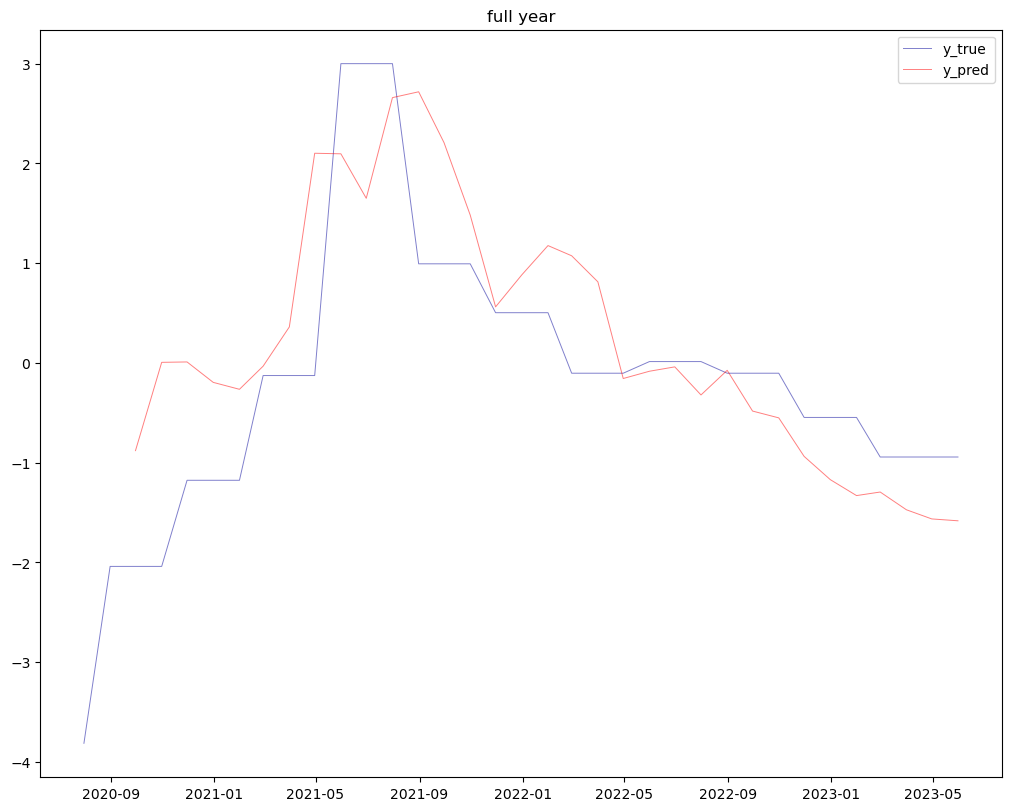

In [82]:
lookback = 6
lookahead = 1
plot_predictions(model_cnn1d_1s, test_loader_1m,
                 test_dateindex, lookback, lookahead)

ValueError: x and y must have same first dimension, but have shapes (35,) and torch.Size([126, 1])

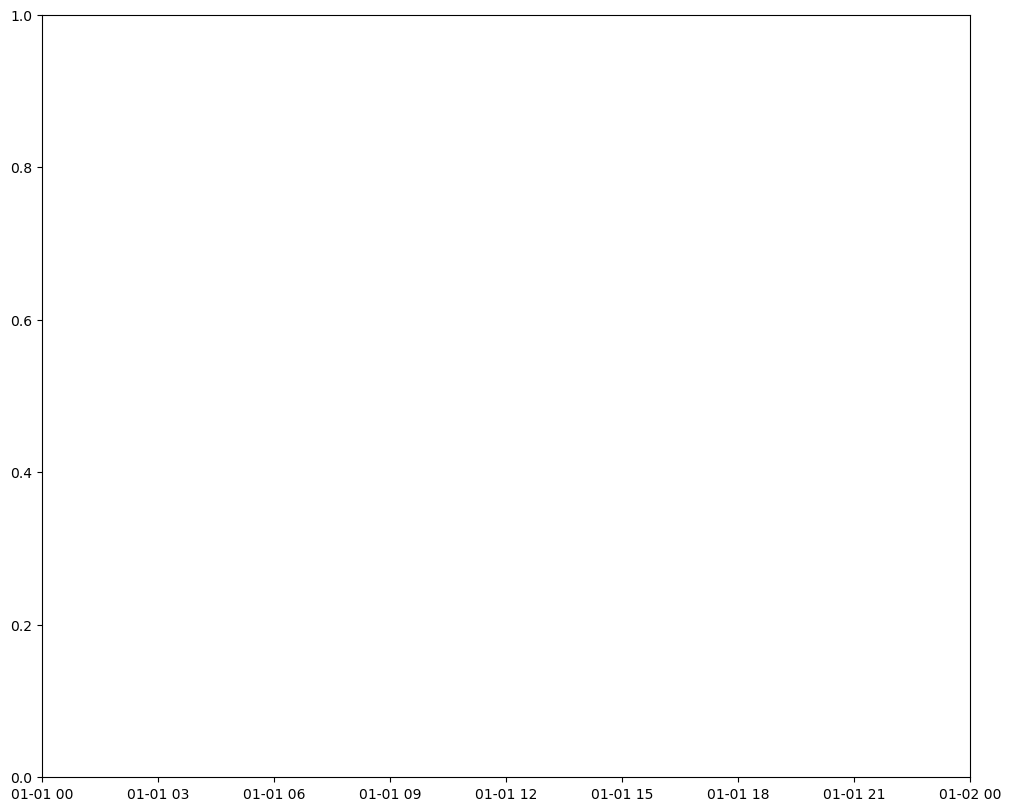

In [98]:
lookback = 6
lookahead = 1
plot_predictions(model_cnn1d_1s, train_loader_1m,
                 test_dateindex, lookback, lookahead)

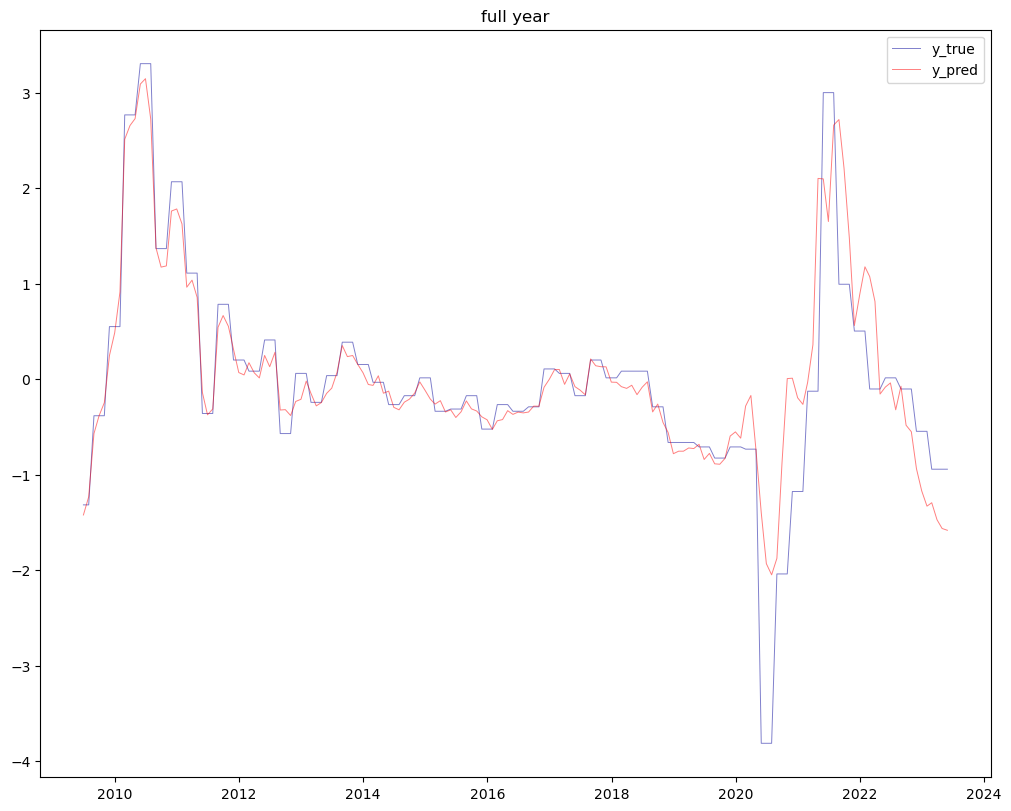

In [99]:
lookback = 6
lookahead = 1
plot_predictions(model_cnn1d_1s, total_loader_1m,
                 total_dateindex, lookback, lookahead)

In [65]:
#### HELPER - PLOT FORECAST ####
import matplotlib.pyplot as plt

def plot_predictions(model, 
                     test_loader, 
                     test_dateindex,
                     lookback,
                     lookahead
                     ):
    y_pred = model.predict(test_loader.dataset.X)
    y_pred = y_pred.cpu().detach()

    start = lookback
    end = len(test_dateindex) - lookahead

    fig, axs = plt.subplots(1,1, figsize=(10,8), constrained_layout=True)

    # for ax in axs.ravel():
    axs.plot(test_dateindex[start:end], 
            test_loader.dataset.y, 
            linewidth=0.7, alpha=0.5, 
            color='#000099', label='y_true')

    axs.plot(test_dateindex[start:end], 
            y_pred, 
            linewidth=0.7, alpha=0.5, 
            color='#ff0000', label='y_pred')

    axs.legend()

    axs.set_title('full year')
    # axs[1].set_title('first 30 days')
    # axs[2].set_title('last 30 days')
    # axs[1].set_xlim(test_dateindex[start], test_dateindex[start+24*30])
    # axs[2].set_xlim(test_dateindex[end-24*30], test_dateindex[end])
    

In [ ]:

import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device('cpu')
print("torch.device =>", device)

In [ ]:
def plot(self, model=None, plot_col="pm2.5", max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.col_idx[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n + 1)
        plt.ylabel(f"{plot_col} [normed]")
        plt.plot(
            self.lookback_idx,
            inputs[n, :, plot_col_index],
            label="Inputs",
            marker=".",
            zorder=-10,
        )

        if self.label_column:
            label_col_index = self.label_col_idx.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(
            self.label_idx,
            labels[n, :, label_col_index],
            edgecolors="k",
            label="Labels",
            c="#2ca02c",
            s=64,
        )
        if model is not None:
            predictions = model(inputs)
            plt.scatter(
                self.label_idx,
                predictions[n, :, label_col_index],
                marker="X",
                edgecolors="k",
                label="Predictions",
                c="#ff7f0e",
                s=64,
            )

        if n == 0:
            plt.legend()

    plt.xlabel("Time [h]")

plot(